In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking for null values:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import seaborn as sns
import numpy as np

In [7]:
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

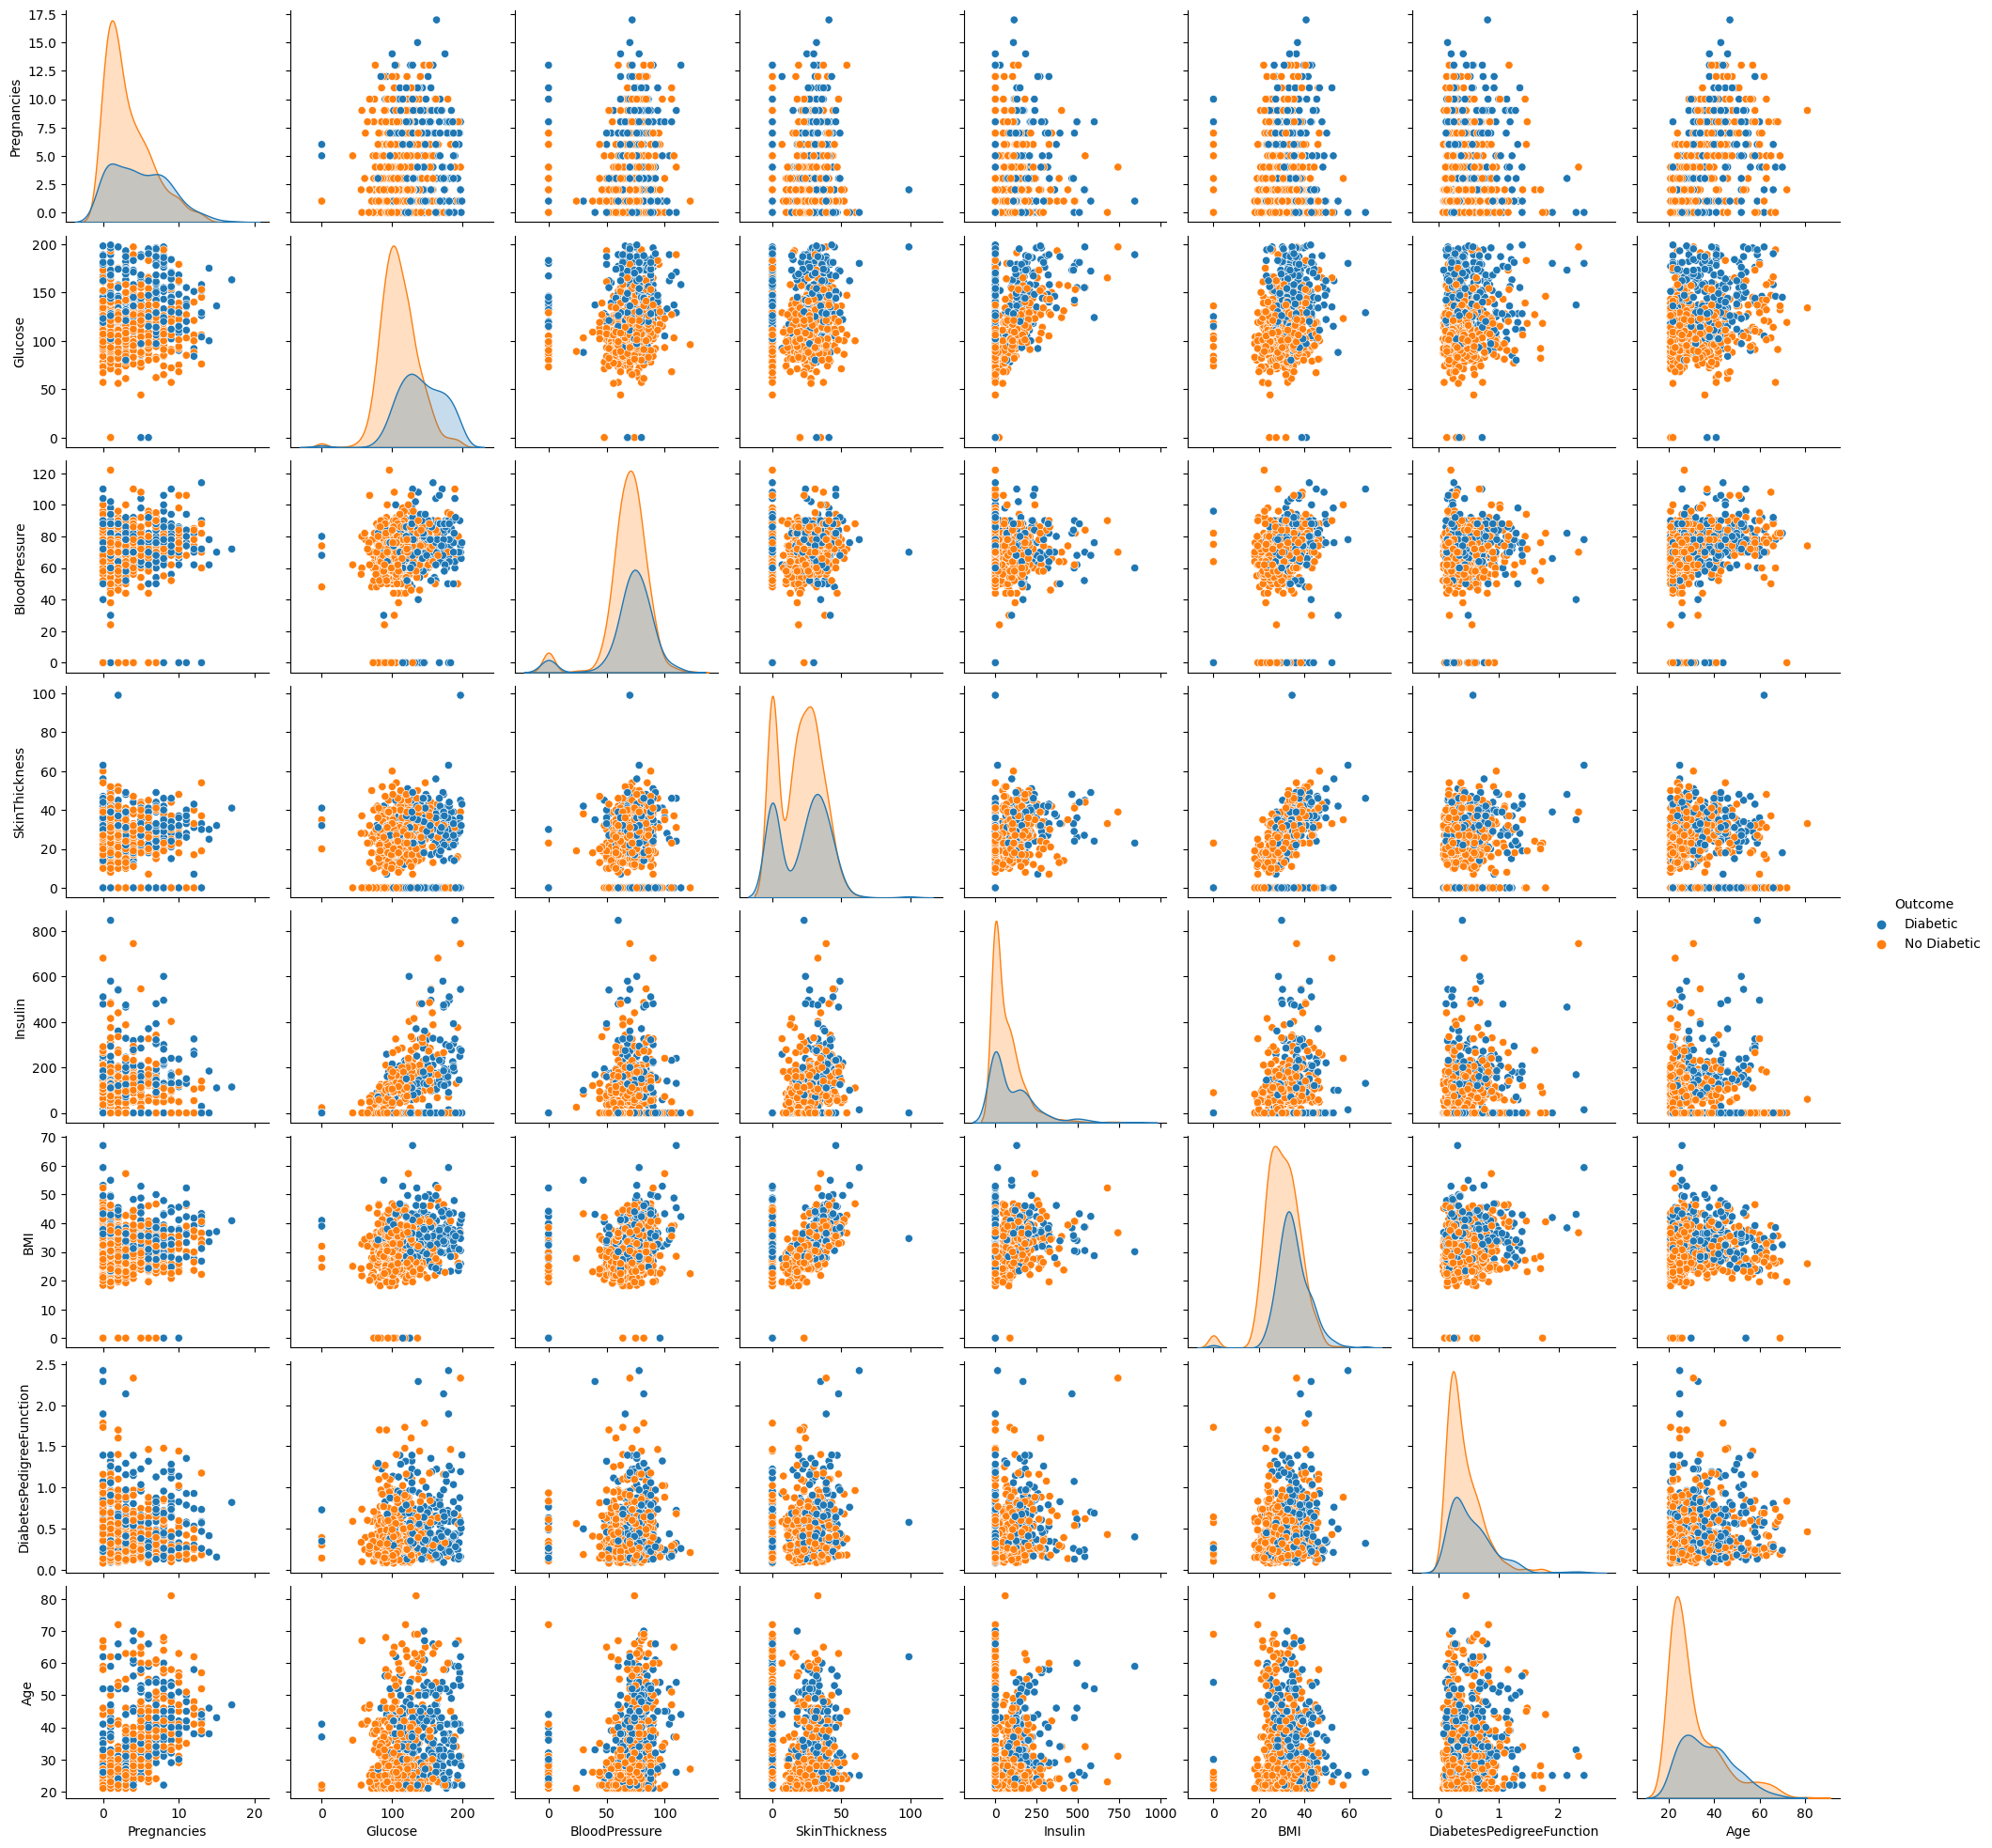

In [8]:
sns.pairplot(df,hue="Outcome")

In [9]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X=df.drop('Outcome',axis=1).values ##independent values
y=df['Outcome'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [16]:
### Creating Tensors
X_train=torch.FloatTensor(X_train) ##independent features needs to be convert into float tensor
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [20]:
df.shape ##8 independent feature columns and 1 dependent feature column

(768, 9)

In [22]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1) ##hidden layer connection with inputl_layer
        self.f_connected2=nn.Linear(hidden1,hidden2)  ## hidden layer1 --> hidden layer2
        self.out=nn.Linear(hidden2,out_features)      ## hidden layer2 --> output layer
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [24]:
torch.manual_seed(20)
model=ANN_Model()

In [26]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [28]:
## Backward Propagation:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [29]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 3.4572105407714844
Epoch number: 11 and the loss: 0.8019207119941711
Epoch number: 21 and the loss: 0.6090322136878967
Epoch number: 31 and the loss: 0.5917770862579346
Epoch number: 41 and the loss: 0.5679707527160645
Epoch number: 51 and the loss: 0.5529041886329651
Epoch number: 61 and the loss: 0.5410094857215881
Epoch number: 71 and the loss: 0.5310389995574951
Epoch number: 81 and the loss: 0.5220361351966858
Epoch number: 91 and the loss: 0.5135972499847412
Epoch number: 101 and the loss: 0.5061253905296326
Epoch number: 111 and the loss: 0.498340904712677
Epoch number: 121 and the loss: 0.4960551857948303
Epoch number: 131 and the loss: 0.48286372423171997
Epoch number: 141 and the loss: 0.4755900502204895
Epoch number: 151 and the loss: 0.48198607563972473
Epoch number: 161 and the loss: 0.48064836859703064
Epoch number: 171 and the loss: 0.4706920385360718
Epoch number: 181 and the loss: 0.45908692479133606
Epoch number: 191 and the loss: 0.45079

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

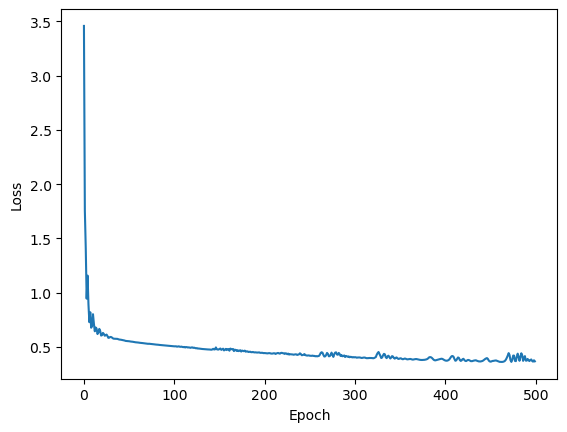

In [35]:
final_losses_tensor = torch.tensor(final_losses)
plt.plot(range(epochs), final_losses_tensor.detach().numpy())
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [41]:
predictions=[]
with torch.no_grad():
     for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)

Text(95.72222222222221, 0.5, 'Predicted Values')

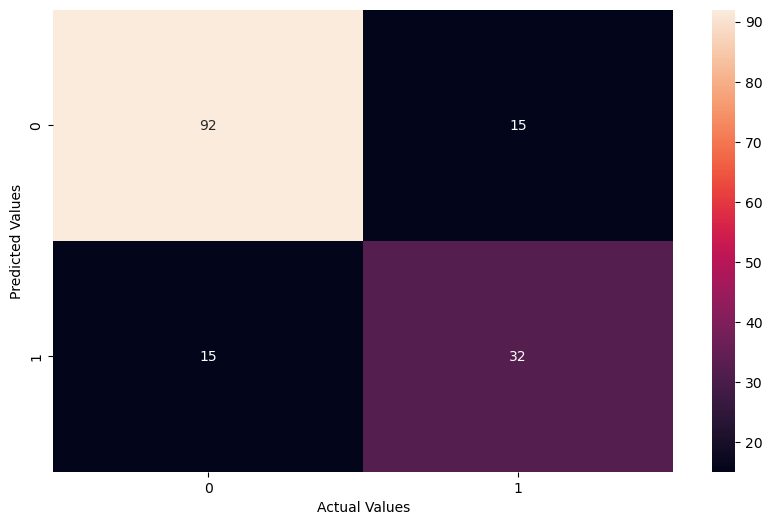

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [47]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [48]:
## Saving the model:
torch.save(model,'diabetes.pt')

In [49]:
model=torch.load('diabetes.pt')

In [50]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [52]:
##Predicting for new data:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [53]:
lst1=[6.0, 136.0, 72.0, 35.0, 0.0, 33.6, 0.627, 55.0]


In [54]:
new_data=torch.tensor(lst1)

In [55]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.6353, 1.5927])
0
